## LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#NORMALIZATION
from sklearn.preprocessing import StandardScaler, LabelEncoder

#K MEANS
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

#PCA
from sklearn.decomposition import PCA

## FILE LOADING AND PREPROCESSING

In [2]:
#******************************************FILE******************************************
# Load the dataset
df = pd.read_csv(r"G:\MIKE\Programming\2024\Repositories\Atillo-ML\Updated\Clustering\Datasets\Credit Card.csv")

df = df.drop(columns=['CUST_ID'])
#******************************************FILE******************************************

In [3]:
#******************************************PREPROCESS******************************************
# REMOVE ROWS IF MISSING VALUE
df_cleaned = df.dropna()

# NORMALIZE
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cleaned)
#******************************************PREPROCESS******************************************
print(df_scaled)

[[-0.74462486 -0.37004679 -0.42918384 ... -0.30550763 -0.53772694
   0.35518066]
 [ 0.76415211  0.06767893 -0.47320819 ...  0.08768873  0.21238001
   0.35518066]
 [ 0.42660239  0.50540465 -0.11641251 ... -0.09990611 -0.53772694
   0.35518066]
 ...
 [-0.75297728 -0.29709491 -0.40657175 ... -0.32957217  0.30614422
  -4.22180042]
 [-0.75772142 -0.29709491 -0.47320819 ... -0.34081076  0.30614422
  -4.22180042]
 [-0.58627829 -1.09958965  0.03129519 ... -0.32709767 -0.53772694
  -4.22180042]]


## PCA AND CLUSTERING


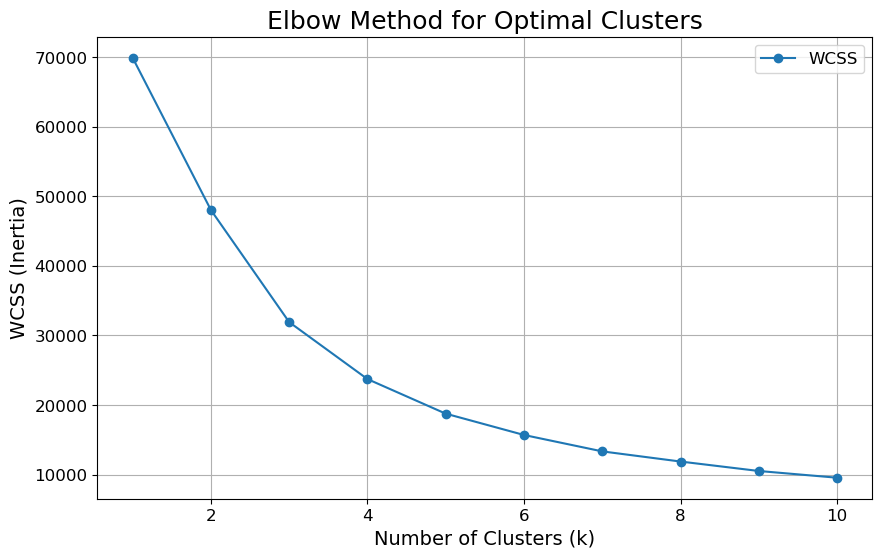

In [4]:
#******************************************PCA******************************************
pca = PCA(n_components=2)  # Reduce to 2 components for easier visualization
df_pca = pca.fit_transform(df_scaled)
#******************************************PCA******************************************





#******************************************FINDING OPTIMAL K******************************************
# Elbow Method to find optimal clusters
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, 
                    random_state=42, 
                    n_init=10, 
                    max_iter=300)
    kmeans.fit(df_pca)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Curve with larger text
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', label='WCSS')
plt.title("Elbow Method for Optimal Clusters", fontsize=18)  # Larger title
plt.xlabel("Number of Clusters (k)", fontsize=14)  # Larger x-axis label
plt.ylabel("WCSS (Inertia)", fontsize=14)  # Larger y-axis label
plt.xticks(fontsize=12)  # Larger font for x-axis ticks
plt.yticks(fontsize=12)  # Larger font for y-axis ticks
plt.grid()
plt.legend(fontsize=12)  # Add legend with larger font
plt.show()
#******************************************FINDING OPTIMAL K******************************************

In [7]:
#******************************************K AND ITS SCORES (SILHOUETES AND DB)******************************************
# Test a range of cluster numbers for silhouette score and Davies-Bouldin Score
best_silhouette = -1
best_k = None

silhouette_scores_table = []

for n_clusters in range(2, 11):  # Testing clusters from 2 to 10
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10, max_iter=300)
    cluster_labels = kmeans.fit_predict(df_pca)
    silhouette_avg = silhouette_score(df_pca, cluster_labels)
    db_score = davies_bouldin_score(df_pca, cluster_labels)
    silhouette_scores_table.append({"Number of Clusters": n_clusters, 
                                    "Silhouette Score": round(silhouette_avg, 3), 
                                    "Davies-Bouldin Score": round(db_score, 3)})
    
    if silhouette_avg > best_silhouette:
        best_silhouette = silhouette_avg
        best_k = n_clusters

# Create a DataFrame to display the tabulated silhouette and Davies-Bouldin scores
silhouette_scores_df = pd.DataFrame(silhouette_scores_table)

# Display the tabulated scores in the console
print(silhouette_scores_df)
#******************************************K AND ITS SCORES (SILHOUETES AND DB)******************************************




   Number of Clusters  Silhouette Score  Davies-Bouldin Score
0                   2             0.460                 1.005
1                   3             0.448                 0.815
2                   4             0.405                 0.803
3                   5             0.401                 0.780
4                   6             0.380                 0.796
5                   7             0.378                 0.814
6                   8             0.393                 0.768
7                   9             0.368                 0.802
8                  10             0.363                 0.822


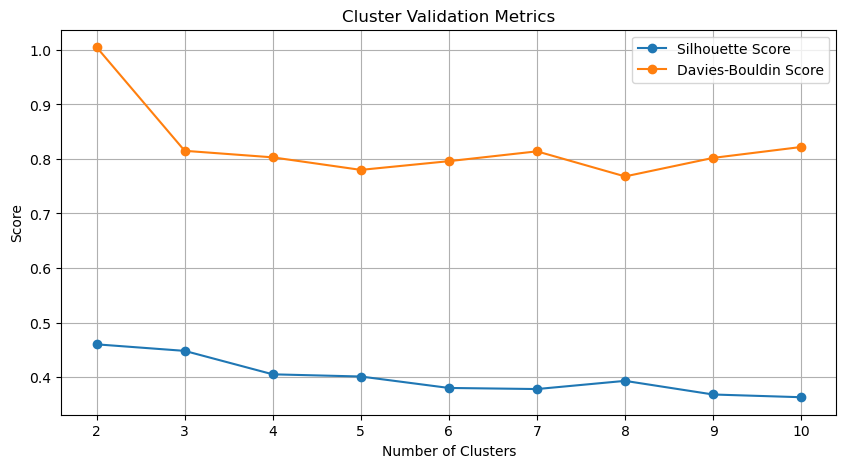

In [8]:
#******************************************VISUALIZE SILHOUTETTE AND DAVIES BOULDIN SCORE******************************************
plt.figure(figsize=(10, 5))
plt.plot(silhouette_scores_df["Number of Clusters"], silhouette_scores_df["Silhouette Score"], marker='o', label="Silhouette Score")
plt.plot(silhouette_scores_df["Number of Clusters"], silhouette_scores_df["Davies-Bouldin Score"], marker='o', label="Davies-Bouldin Score")
plt.xlabel("Number of Clusters")
plt.ylabel("Score")
plt.title("Cluster Validation Metrics")
plt.legend()
plt.grid()
plt.show()
#******************************************VISUALIZE SILHOUTETTE AND DAVIES BOULDIN SCORE******************************************

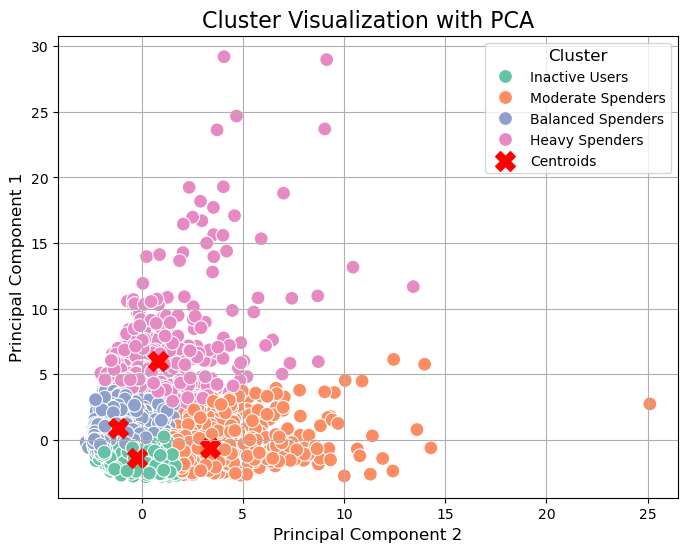

In [48]:
#******************************************K MEANS******************************************
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10, max_iter=300)  # Adjust n_clusters as needed
cluster_labels = kmeans.fit_predict(df_pca)
#******************************************K MEANS******************************************





#******************************************SCATTER PLOT******************************************
#PUT COLUMN NAME TO PCA RESULTS (PC1, PC2) AND MAKE NEW DF
df_pca_df = pd.DataFrame(df_pca, columns=["PC1", "PC2"])  # Assuming 2 principal components
df_pca_df['Cluster'] = cluster_labels

#CHANGE CLUSTER NAME
cluster_name_mapping = {
    0: "Moderate Spenders",
    1: "Inactive Users",
    2: "Heavy Spenders",
    3: "Balanced Spenders",
    # Add more mappings if you have more clusters
}
df_pca_df['Cluster'] = df_pca_df['Cluster'].map(cluster_name_mapping)

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x="PC2", y="PC1", 
    hue="Cluster", 
    palette="Set2", 
    data=df_pca_df, 
    s=100
)
plt.scatter(kmeans.cluster_centers_[:, 1],
            kmeans.cluster_centers_[:, 0], 
            c='red', 
            marker='X',
            s=200, 
            label='Centroids')      
plt.title("Cluster Visualization with PCA", fontsize=16)
plt.xlabel("Principal Component 2", fontsize=12)
plt.ylabel("Principal Component 1", fontsize=12)
plt.legend(title="Cluster", fontsize=10, title_fontsize=12)
plt.grid(True)
plt.show()
#******************************************SCATTER PLOT******************************************